<a href="https://colab.research.google.com/github/VatsalSin/PyData-Patna/blob/main/PyData_Patna_prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyData Patna Conference

## Prophet Model


In [1]:
#to install the prophet library if not already installed
!pip install fbprophet

In [2]:
#download the dataset
!wget https://raw.githubusercontent.com/VatsalSin/PyData-Patna/main/Datasets/AirPassengers.csv

--2020-12-05 00:23:17--  https://raw.githubusercontent.com/VatsalSin/PyData-Patna/main/Datasets/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [text/plain]
Saving to: ‘AirPassengers.csv’

AirPassengers.csv   100%[===================>]   1.71K  --.-KB/s    in 0s      

2020-12-05 00:23:17 (23.9 MB/s) - ‘AirPassengers.csv’ saved [1746/1746]



In [3]:
#importing useful libraries

import pandas as pd   #python library to manage datasets
import numpy as np    #python library for matheimatical and linear algebra operations

import matplotlib.pyplot as plt #python library for plotting graphs

from fbprophet import Prophet #python library that contains the code for prophet model
from sklearn.metrics import mean_absolute_error   #a function to calculate the mean absolute error for the forecasts

In [4]:
#we can also define our own metric functions like MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Importing and preparing the dataset

In [5]:
#importing the dataset from a CSV file into a pandas dataframe

df = pd.read_csv('/content/AirPassengers.csv')
df.columns = ['ds', 'y']
print(df)

          ds    y
0    1949-01  112
1    1949-02  118
2    1949-03  132
3    1949-04  129
4    1949-05  121
..       ...  ...
139  1960-08  606
140  1960-09  508
141  1960-10  461
142  1960-11  390
143  1960-12  432

[144 rows x 2 columns]


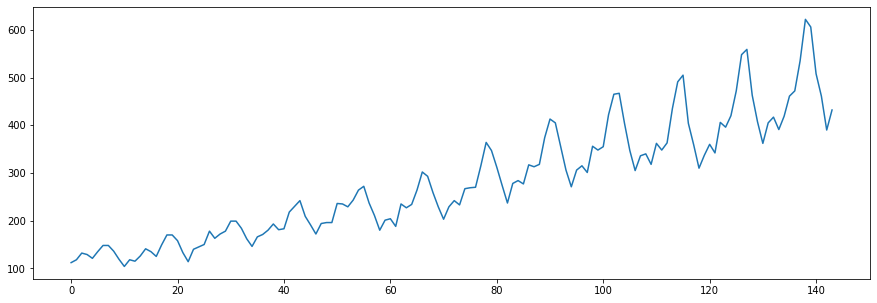

In [6]:
#plot the time series

plt.figure(figsize=(15, 5))     #set the plot size
df['y'].plot()               

In [7]:
#calculating the size of training and test set.

data_len = len(df)
train_data_len = int(data_len*0.75)
test_data_len = int(data_len - train_data_len)
print('Length of data =', data_len)
print('Training Data Length =', train_data_len)
print('Test Data Length =', test_data_len)

Length of data = 144
Training Data Length = 108
Test Data Length = 36


In [8]:
#dividing the data into train and test set.

df_train = df[:train_data_len]
df_test = df[train_data_len:]

### Creating and training a prophet model

In [9]:
#creating an model using the prophet library imported above

model = Prophet()       #instantiating a model
model.fit(df_train)     #training the model

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
#setting the forecast length and frequency

future = model.make_future_dataframe(periods = test_data_len,freq='M')
print(future)

            ds
0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
..         ...
139 1960-07-31
140 1960-08-31
141 1960-09-30
142 1960-10-31
143 1960-11-30

[144 rows x 1 columns]


### Forecasting

In [11]:
#using the prophet model for making the final prediction
#yhat: mean of the predicted value for the number of Passenger
#yhat_upper: estimate of the upper bound of the number of Passenger
#yhat_lower: estimate of the lower bound of the number of Passenger


forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
139,1960-07-31,535.728473,515.111918,554.307161
140,1960-08-31,514.265672,493.428058,533.129893
141,1960-09-30,484.107198,463.787691,504.481311
142,1960-10-31,457.330072,436.615917,476.486039
143,1960-11-30,484.382856,464.362565,503.730633


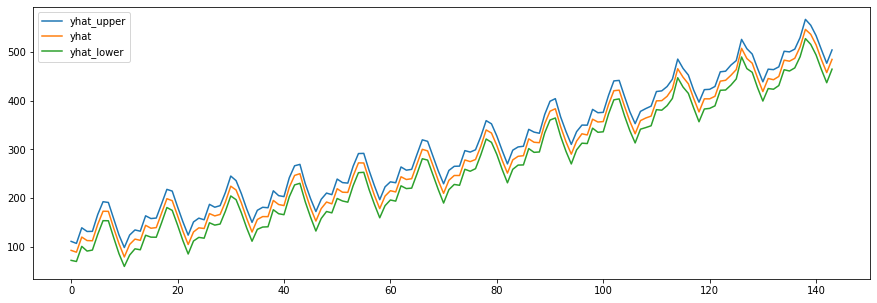

In [12]:
#plotting the forecast values

plt.figure(figsize=(15, 5))                           #set the plot size
forecast['yhat_upper'].plot(label = 'yhat_upper')     #plot the predicted upper bound
forecast['yhat'].plot(label = 'yhat')                 #plot the predicted mean
forecast['yhat_lower'].plot(label = 'yhat_lower')     #plot the predicted lower bound
plt.legend()                                          #adds the color legend to the graph

### Components of time sereis

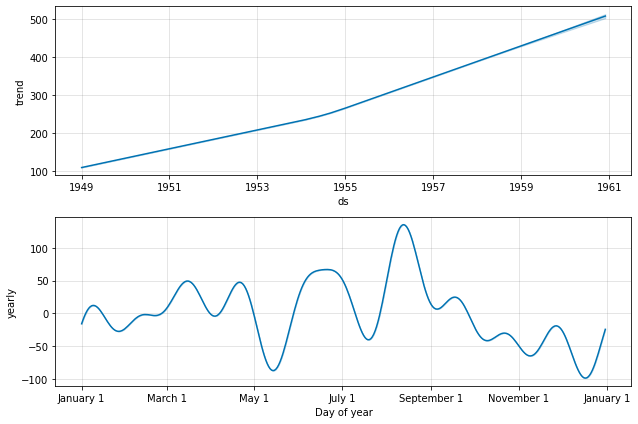

In [13]:
#plot the components obtained by prophet model
fig = model.plot_components(forecast)

### Analysis of results obtained

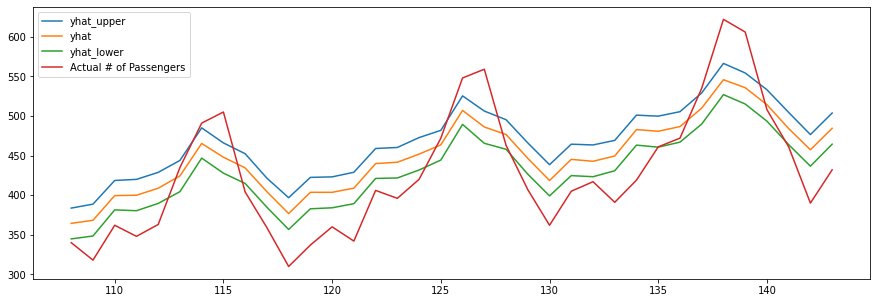

In [14]:
#plotting the forecast values along with actual value for a comparision only for test data

plt.figure(figsize=(15, 5))                                            #set the plot size
forecast['yhat_upper'][train_data_len:].plot(label = 'yhat_upper')     #plot the predicted upper bound only for test data
forecast['yhat'][train_data_len:].plot(label = 'yhat')                 #plot the predicted mean only for test data
forecast['yhat_lower'][train_data_len:].plot(label = 'yhat_lower')     #plot the predicted lower bound only for test data
df['y'][train_data_len:].plot(label = 'Actual # of Passengers')        #plot the actual value of time series only for test data
plt.legend()           

In [15]:
#calculate the metrics for the forecasts
y_true = df['y'][train_data_len:]                                 #assign actual values of # of Passenger to y_true
y_pred = forecast['yhat'][train_data_len:]                        #assign predicted values of # of Passenger to y_pred
print('MAE =', mean_absolute_error(y_true, y_pred))               #calculate and print the MAE
print('MAPE =', mean_absolute_percentage_error(y_true, y_pred))   #calculate and print the MAE


MAE = 41.925949211473956
MAPE = 10.24469667646021


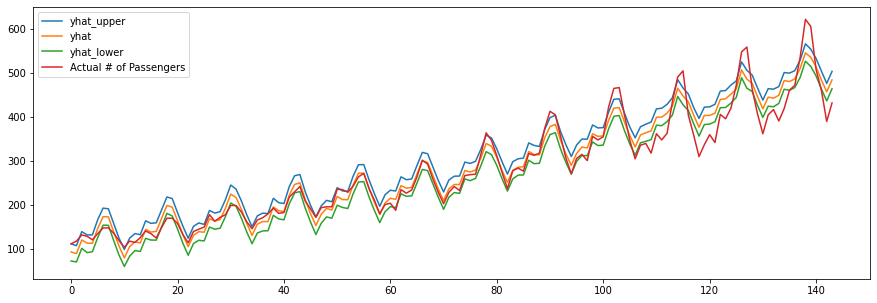

In [16]:
#plotting the forecast values along with actual value for a comparision

plt.figure(figsize=(15, 5))                           #set the plot size
forecast['yhat_upper'].plot(label = 'yhat_upper')     #plot the predicted upper bound
forecast['yhat'].plot(label = 'yhat')                 #plot the predicted mean
forecast['yhat_lower'].plot(label = 'yhat_lower')     #plot the predicted lower bound
df['y'].plot(label = 'Actual # of Passengers')        #plot the actual value of time series
plt.legend()           